### Download Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
np.random.seed(123)
warnings.filterwarnings('ignore')
%matplotlib inline

ModuleNotFoundError: No module named 'matplotlib'

In [2]:
#import classifier algorithm here
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
import xgboost as xgb
from xgboost import XGBClassifier

In [3]:
#import data
train_data = pd.read_csv('Train.csv')
test_data = pd.read_csv('Test.csv')

train_data.shape

(23524, 13)

In [4]:
test_data.shape

(10086, 12)

In [13]:
#test_data[:1].to_dict()

## EDA

Ranges of values, missing values, analysis of target variable, feature importance analysis

In [5]:
train_data.describe(include='int64')

year  household_size  age_of_respondent
count  23524.000000    23524.000000       23524.000000
mean    2016.975939        3.797483          38.805220
std        0.847371        2.227613          16.520569
min     2016.000000        1.000000          16.000000
25%     2016.000000        2.000000          26.000000
50%     2017.000000        3.000000          35.000000
75%     2018.000000        5.000000          49.000000
max     2018.000000       21.000000         100.000000

In [6]:
test_data.describe()

year  household_size  age_of_respondent
count  10086.000000    10086.000000       10086.000000
mean    2016.975907        3.778802          38.308348
std        0.847356        2.212721          16.270053
min     2016.000000        1.000000          16.000000
25%     2016.000000        2.000000          26.000000
50%     2017.000000        3.000000          35.000000
75%     2018.000000        5.000000          48.000000
max     2018.000000       20.000000         100.000000

In [7]:
#Null Values
train_data.isna().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

In [8]:
test_data.isna().sum()

country                   0
year                      0
uniqueid                  0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

**Preview Data**

In [9]:
train_data.head()

country  year    uniqueid bank_account location_type cellphone_access  \
0   Kenya  2018  uniqueid_1          Yes         Rural              Yes   
1   Kenya  2018  uniqueid_2           No         Rural               No   
2   Kenya  2018  uniqueid_3          Yes         Urban              Yes   
3   Kenya  2018  uniqueid_4           No         Rural              Yes   
4   Kenya  2018  uniqueid_5           No         Urban               No   

   household_size  age_of_respondent gender_of_respondent  \
0               3                 24               Female   
1               5                 70               Female   
2               5                 26                 Male   
3               5                 34               Female   
4               8                 26                 Male   

  relationship_with_head           marital_status  \
0                 Spouse  Married/Living together   
1      Head of Household                  Widowed   
2         Other relative     Single/Never Married   
3      Head of Household  Married/Living together   
4                  Child     Single/Never Married   

                   education_level                   job_type  
0              Secondary education              Self employed  
1              No formal education       Government Dependent  
2  Vocational/Specialised training              Self employed  
3                Primary education  Formally employed Private  
4                Primary education        Informally employed

In [10]:
# Drop Missing columns
#train_data.dropna(axis = 0, inplace = True)

#show Some information about the dataset
#print(train_data.info())

In [11]:
# Drop Missing columns
# test_data.dropna(axis = 0, inplace = True)

#show Some information about the dataset
#print(test_data.info())

## Target Label

In [12]:
# Distribution
dist =train_data['bank_account'].value_counts()
dist

No     20212
Yes     3312
Name: bank_account, dtype: int64

([<matplotlib.patches.Wedge at 0x7fb618819e90>,
 [Text(-0.9941407919707725, 0.47083339488584, 'No'),
  Text(0.9941408140120733, -0.47083334834675034, 'Yes')],
 [Text(-0.5422586138022395, 0.25681821539227634, '85.92'),
  Text(0.5422586258247672, -0.25681819000731837, '14.08')])

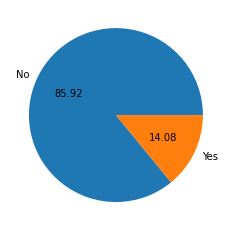

In [13]:
plt.pie(dist, labels=dist.index, autopct='%.2f')

In [14]:
train_data['bank_account'] = train_data['bank_account'].map({'Yes': 1, 'No': 0})

In [15]:
train_data

country  year       uniqueid  bank_account location_type  \
0       Kenya  2018     uniqueid_1             1         Rural   
1       Kenya  2018     uniqueid_2             0         Rural   
2       Kenya  2018     uniqueid_3             1         Urban   
3       Kenya  2018     uniqueid_4             0         Rural   
4       Kenya  2018     uniqueid_5             0         Urban   
...       ...   ...            ...           ...           ...   
23519  Uganda  2018  uniqueid_2113             0         Rural   
23520  Uganda  2018  uniqueid_2114             0         Rural   
23521  Uganda  2018  uniqueid_2115             0         Rural   
23522  Uganda  2018  uniqueid_2116             0         Urban   
23523  Uganda  2018  uniqueid_2117             0         Rural   

      cellphone_access  household_size  age_of_respondent  \
0                  Yes               3                 24   
1                   No               5                 70   
2                  Yes               5                 26   
3                  Yes               5                 34   
4                   No               8                 26   
...                ...             ...                ...   
23519              Yes               4                 48   
23520              Yes               2                 27   
23521              Yes               5                 27   
23522              Yes               7                 30   
23523              Yes              10                 20   

      gender_of_respondent relationship_with_head           marital_status  \
0                   Female                 Spouse  Married/Living together   
1                   Female      Head of Household                  Widowed   
2                     Male         Other relative     Single/Never Married   
3                   Female      Head of Household  Married/Living together   
4                     Male                  Child     Single/Never Married   
...                    ...                    ...                      ...   
23519               Female      Head of Household       Divorced/Seperated   
23520               Female      Head of Household     Single/Never Married   
23521               Female                 Parent                  Widowed   
23522               Female                 Parent       Divorced/Seperated   
23523                 Male                  Child     Single/Never Married   

                       education_level                   job_type  
0                  Secondary education              Self employed  
1                  No formal education       Government Dependent  
2      Vocational/Specialised training              Self employed  
3                    Primary education  Formally employed Private  
4                    Primary education        Informally employed  
...                                ...                        ...  
23519              No formal education               Other Income  
23520              Secondary education               Other Income  
23521                Primary education               Other Income  
23522              Secondary education              Self employed  
23523              Secondary education                  No Income  

[23524 rows x 13 columns]

In [16]:
#separate features from target
X_train = train_data.drop(['bank_account'], axis=1)
y_train = train_data['bank_account']
print(y_train)

0        1
1        0
2        1
3        0
4        0
        ..
23519    0
23520    0
23521    0
23522    0
23523    0
Name: bank_account, Length: 23524, dtype: int64


## Preprocessing

In [17]:
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse=False)

In [18]:
train_dicts = train_data.to_dict(orient='records')
dv.fit(train_dicts)

DictVectorizer(sparse=False)

In [19]:
X_train = dv.transform(train_dicts)

In [20]:
print("Train Dataset Shape", X_train.shape)
print("Train Feature Names", dv.get_feature_names())

Train Dataset Shape (23524, 8776)
Train Feature Names ['age_of_respondent', 'bank_account', 'cellphone_access=No', 'cellphone_access=Yes', 'country=Kenya', 'country=Rwanda', 'country=Tanzania', 'country=Uganda', 'education_level=No formal education', 'education_level=Other/Dont know/RTA', 'education_level=Primary education', 'education_level=Secondary education', 'education_level=Tertiary education', 'education_level=Vocational/Specialised training', 'gender_of_respondent=Female', 'gender_of_respondent=Male', 'household_size', 'job_type=Dont Know/Refuse to answer', 'job_type=Farming and Fishing', 'job_type=Formally employed Government', 'job_type=Formally employed Private', 'job_type=Government Dependent', 'job_type=Informally employed', 'job_type=No Income', 'job_type=Other Income', 'job_type=Remittance Dependent', 'job_type=Self employed', 'location_type=Rural', 'location_type=Urban', 'marital_status=Divorced/Seperated', 'marital_status=Dont know', 'marital_status=Married/Living toge

### Split Target Label and Validation Data

In [21]:
#split train data
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, stratify = y_train, test_size=0.1, random_state=42)

## Feature Importance

In [22]:
model = RandomForestClassifier(n_estimators=10, max_depth=20, random_state=1, n_jobs=-1)

In [23]:
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, n_estimators=10, n_jobs=-1, random_state=1)

In [24]:
d = {'feature': dv.get_feature_names(), 'values': model.feature_importances_}
feature_info_values = pd.DataFrame(data = d)
feature_info_values.sort_values('values', ascending = False)

feature    values
1                                        bank_account  0.236532
19              job_type=Formally employed Government  0.111965
13    education_level=Vocational/Specialised training  0.106512
12                 education_level=Tertiary education  0.048340
20                 job_type=Formally employed Private  0.032874
...                                               ...       ...
3157                           uniqueid=uniqueid_3804  0.000000
3156                           uniqueid=uniqueid_3803  0.000000
3155                           uniqueid=uniqueid_3802  0.000000
3154                           uniqueid=uniqueid_3801  0.000000
4388                           uniqueid=uniqueid_4912  0.000000

[8776 rows x 2 columns]

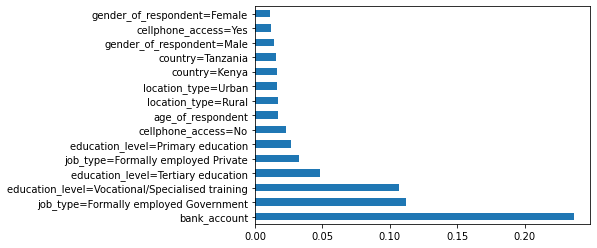

In [25]:
feat_importances = pd.Series(model.feature_importances_, index=dv.get_feature_names())
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

In [26]:
# Choose Features



In [27]:
rt = dv.get_feature_names()
features = (str(rt)[1:-1])

In [28]:
features

"'age_of_respondent', 'bank_account', 'cellphone_access=No', 'cellphone_access=Yes', 'country=Kenya', 'country=Rwanda', 'country=Tanzania', 'country=Uganda', 'education_level=No formal education', 'education_level=Other/Dont know/RTA', 'education_level=Primary education', 'education_level=Secondary education', 'education_level=Tertiary education', 'education_level=Vocational/Specialised training', 'gender_of_respondent=Female', 'gender_of_respondent=Male', 'household_size', 'job_type=Dont Know/Refuse to answer', 'job_type=Farming and Fishing', 'job_type=Formally employed Government', 'job_type=Formally employed Private', 'job_type=Government Dependent', 'job_type=Informally employed', 'job_type=No Income', 'job_type=Other Income', 'job_type=Remittance Dependent', 'job_type=Self employed', 'location_type=Rural', 'location_type=Urban', 'marital_status=Divorced/Seperated', 'marital_status=Dont know', 'marital_status=Married/Living together', 'marital_status=Single/Never Married', 'marital

## Initial Training

In [29]:
#!pip install xgboost

In [30]:
#create models
lg_model = LogisticRegression()
rf_model = RandomForestClassifier()
kn_model = KNeighborsClassifier()
et_model = ExtraTreesClassifier()
xg_model = XGBClassifier(objective="binary:logistic", random_state=42)

In [31]:
#fitting models
lg_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
kn_model.fit(X_train, y_train)
et_model.fit(X_train, y_train)


ExtraTreesClassifier()

In [32]:
#A = train_data.drop(['bank_account'], axis=1)
#B = train_data['bank_account']
#Xs_train, Xs_valid, ys_train, ys_valid = train_test_split(A, B, stratify = B, test_size=0.1, random_state=42)

dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)

xg_model.fit(X_train, y_train)

XGBClassifier(random_state=42)

In [33]:
#import evaluation metrics
from sklearn.metrics import confusion_matrix, accuracy_score

#evaluate the models
lg_y_pred = lg_model.predict(X_val)
rf_y_pred = rf_model.predict(X_val)
kn_y_pred = kn_model.predict(X_val)
et_y_pred = et_model.predict(X_val)
xg_y_pred = xg_model.predict(X_val)

In [34]:
#get error rate
print("Error rate of Logisitic Regression Classifier: ", 1 - accuracy_score(y_val, lg_y_pred))
print("Error rate of Random Forest Classifier: ", 1 - accuracy_score(y_val, rf_y_pred))
print("Error rate of KNeighbors Classifier: ", 1 - accuracy_score(y_val, kn_y_pred))
print("Error rate of Extra Tree Classifier: ", 1 - accuracy_score(y_val, et_y_pred))
print("Error rate of XGB Classifier: ", 1 - accuracy_score(y_val, xg_y_pred))

Error rate of Logisitic Regression Classifier:  0.0
Error rate of Random Forest Classifier:  0.004249893752656164
Error rate of KNeighbors Classifier:  0.07522311942201443
Error rate of Extra Tree Classifier:  0.002974925626859304
Error rate of XGB Classifier:  0.0


## Save Model

In [35]:
import pickle 

with open('zindi_fi.bin', 'wb') as f_out:
  pickle.dump(model, f_out)

In [47]:
with open('dv.bin', 'wb') as f_out:
  pickle.dump(dv, f_out)

## Test

In [40]:
test_dict = test_data.to_dict(orient = 'records')

In [41]:
X_test = dv.transform(test_dict)

print("Test Dataset Shape", X_test.shape)
print("Test Feature Names", dv.get_feature_names())

Test Dataset Shape (10086, 8776)
Test Feature Names ['age_of_respondent', 'bank_account', 'cellphone_access=No', 'cellphone_access=Yes', 'country=Kenya', 'country=Rwanda', 'country=Tanzania', 'country=Uganda', 'education_level=No formal education', 'education_level=Other/Dont know/RTA', 'education_level=Primary education', 'education_level=Secondary education', 'education_level=Tertiary education', 'education_level=Vocational/Specialised training', 'gender_of_respondent=Female', 'gender_of_respondent=Male', 'household_size', 'job_type=Dont Know/Refuse to answer', 'job_type=Farming and Fishing', 'job_type=Formally employed Government', 'job_type=Formally employed Private', 'job_type=Government Dependent', 'job_type=Informally employed', 'job_type=No Income', 'job_type=Other Income', 'job_type=Remittance Dependent', 'job_type=Self employed', 'location_type=Rural', 'location_type=Urban', 'marital_status=Divorced/Seperated', 'marital_status=Dont know', 'marital_status=Married/Living togeth

In [42]:
#get the predicted result for the test data
res = et_model.predict(X_test)

In [45]:
print(res)

[0 0 0 ... 0 0 0]


In [46]:

#for i in res:
#  if i == 1:
#    print("Yes")
#  elif i == 0:
#    print("No")

### Export As CSV

In [ ]:
#create submission file
submission = pd.DataFrame({"uniqueid": test_data["uniqueid"] + " x " + test_data["country"], "bank_account": res})

In [ ]:
submission

uniqueid  bank_account
0       uniqueid_6056 x Kenya             0
1       uniqueid_6060 x Kenya             0
2       uniqueid_6065 x Kenya             0
3       uniqueid_6072 x Kenya             0
4       uniqueid_6073 x Kenya             0
...                       ...           ...
10081  uniqueid_2998 x Uganda             0
10082  uniqueid_2999 x Uganda             0
10083  uniqueid_3000 x Uganda             0
10084  uniqueid_3001 x Uganda             0
10085  uniqueid_3002 x Uganda             0

[10086 rows x 2 columns]

In [ ]:
#creaate submission csv file
submission.to_csv('first_submission.csv', index=False)